In [ ]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import wilson_action
from modules import utility
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
#plaquette_data_twist_0 = read_and_write.load_from_folder("../data/output-sun4/traj_120000_combined_444464/output_twist_0","plaquette:", "real")
plaquette_data_twist_1 = read_and_write.load_from_folder("../data/output-sun4/traj_120000_combined_444464/output_twist_1","plaquette:", "real")
#plaquette_data_twist_2 = read_and_write.load_from_folder("../data/output-sun4/traj_120000_combined_444464/output_twist_2","plaquette:", "real")
#plaquette_data_twist = read_and_write.load_from_folder("../data/output-sun4/traj_12000_3232486/output_twist_1","plaquette:", "real")

#plaquette_data = read_and_write.load_from_folder("../data/output-measure-surface/test-muca/beta-10.8053-twist-1-30-30-48-6-merged","plaquette:", "real", ",")

suN_10.744444444444444_3275492
suN_10.744444444444444_3275492
suN_10.8_3419103
suN_10.8_3419103
suN_10.794444444444444_3268359
suN_10.794444444444444_3268359
suN_11.052631578947368_3419107
suN_11.052631578947368_3419107
suN_11.74736842105263_3419118
suN_11.74736842105263_3419118
suN_10.855555555555556_3427268
suN_10.855555555555556_3427268
suN_10.838888888888889_3268363
suN_10.838888888888889_3268363
suN_10.933333333333334_3428993
suN_10.933333333333334_3428993
suN_10.9_3428987
suN_10.9_3428987
suN_10.8_3275497
suN_10.8_3275497
suN_10.894444444444444_3427275
suN_10.894444444444444_3427275
suN_10.86111111111111_3427269
suN_10.86111111111111_3427269
suN_10.805555555555555_3268360
suN_10.805555555555555_3268360
suN_10.9_3427276
suN_10.9_3427276
suN_10.783333333333333_3268358
suN_10.783333333333333_3268358
suN_11.305263157894737_3419111
suN_11.305263157894737_3419111
suN_10.966666666666667_3421934
suN_10.966666666666667_3421934
suN_10.85_3421927
suN_10.85_3421927
suN_10.85_3427267
suN_10.8

In [ ]:
plaquette_data_weight = read_and_write.load_from_folder("../data/output-measure-surface/test-muca/beta-10.8053-twist-1-30-30-48-6-merged","muca_plaquette:", "real")
plaquette_data = read_and_write.load_from_folder("../data/output-measure-surface/test-muca/beta-10.8053-twist-1-30-30-48-6-merged","plaquette:", "real", ",")

plaquette_data_twist_muca

out.txt
out.txt
surface_smooth_20
surface_smooth_30
surface_smooth_2
fourier_profile_5
fourier_profile_20
fourier_profile_2
surface_smooth_10
fourier_profile_30
fourier_profile_0
surface_smooth_5
surface_smooth_0
fourier_profile_10
out.txt
out.txt
surface_smooth_20
surface_smooth_30
surface_smooth_2
fourier_profile_5
fourier_profile_20
fourier_profile_2
surface_smooth_10
fourier_profile_30
fourier_profile_0
surface_smooth_5
surface_smooth_0
fourier_profile_10


{'10.8053 1': array([[0.00721448, 0.00679589, 0.00672012, ..., 0.00679349, 0.00675432,
         0.32454094],
        [0.0082646 , 0.00825345, 0.00814843, ..., 0.00815599, 0.00820274,
         0.3910561 ],
        [0.00865107, 0.00866427, 0.00867017, ..., 0.00861242, 0.00865251,
         0.41404655],
        ...,
        [0.00903582, 0.00911303, 0.00910375, ..., 0.00908742, 0.00907944,
         0.43598069],
        [0.00907001, 0.00910077, 0.00908065, ..., 0.00908621, 0.00910447,
         0.43596453],
        [0.00910912, 0.00908255, 0.00905257, ..., 0.00908046, 0.00906456,
         0.43605996]])}

In [4]:
#plaquette_array_twist_0 = {k: plaquette_data_twist_0[k] for k in sorted(plaquette_data_twist_0)}
plaquette_array_twist_1 = {k: plaquette_data_twist_1[k] for k in sorted(plaquette_data_twist_1)}
#plaquette_array_twist_2 = {k: plaquette_data_twist_2[k] for k in sorted(plaquette_data_twist_2)}


In [ ]:
import numpy as np


def create_histogram_animation(data_dict, filename, temp_min, temp_max):
    fig, ax = plt.subplots()

    # Filter the data_dict based on the temperature range
    filtered_data_dict = {k: v for k, v in data_dict.items() if temp_min <= float(k.split(" ")[0]) <= temp_max}

    # Calculate global min and max values for the x-axis using numpy operations

    all_data = np.concatenate([data[1000:] for data in filtered_data_dict.values()])
    global_min = np.min(all_data)
    global_max = np.max(all_data)

    # Function to update the histogram for each frame
    def update_hist(num, data, bins, ax):
        ax.clear()
        ax.hist(data[num][1000:], bins=bins, color='blue', alpha=0.7)
        #ax.set_xlim(global_min, global_max)
        ax.set_title(f"Temperature: {list(filtered_data_dict.keys())[num]}")
        ax.set_xlabel('Average Plaquette Action')
        ax.set_ylabel('Frequency')

    # Extract the data and number of bins
    data = list(filtered_data_dict.values())
    bins = 100

    # Create the animation
    ani = animation.FuncAnimation(fig, update_hist, frames=len(data), fargs=(data, bins, ax), repeat=False)

    # Save the animation
    ani.save(filename, writer='ffmpeg')

    # Close the plot to avoid displaying it in the notebook
    plt.close(fig)

# Create and save animations for all plaquette data sets within the temperature range
temp_min = 10.75
temp_max = 10.85
create_histogram_animation(plaquette_data_twist_0, '../videos/histogram_animation/twist_0.mp4', temp_min, temp_max)
create_histogram_animation(plaquette_data_twist_1, '../videos/histogram_animation/twist_1.mp4', temp_min, temp_max)
create_histogram_animation(plaquette_data_twist_2, '../videos/histogram_animation/twist_2.mp4', temp_min, temp_max)

/tmp/ipykernel_893008/3342762382.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


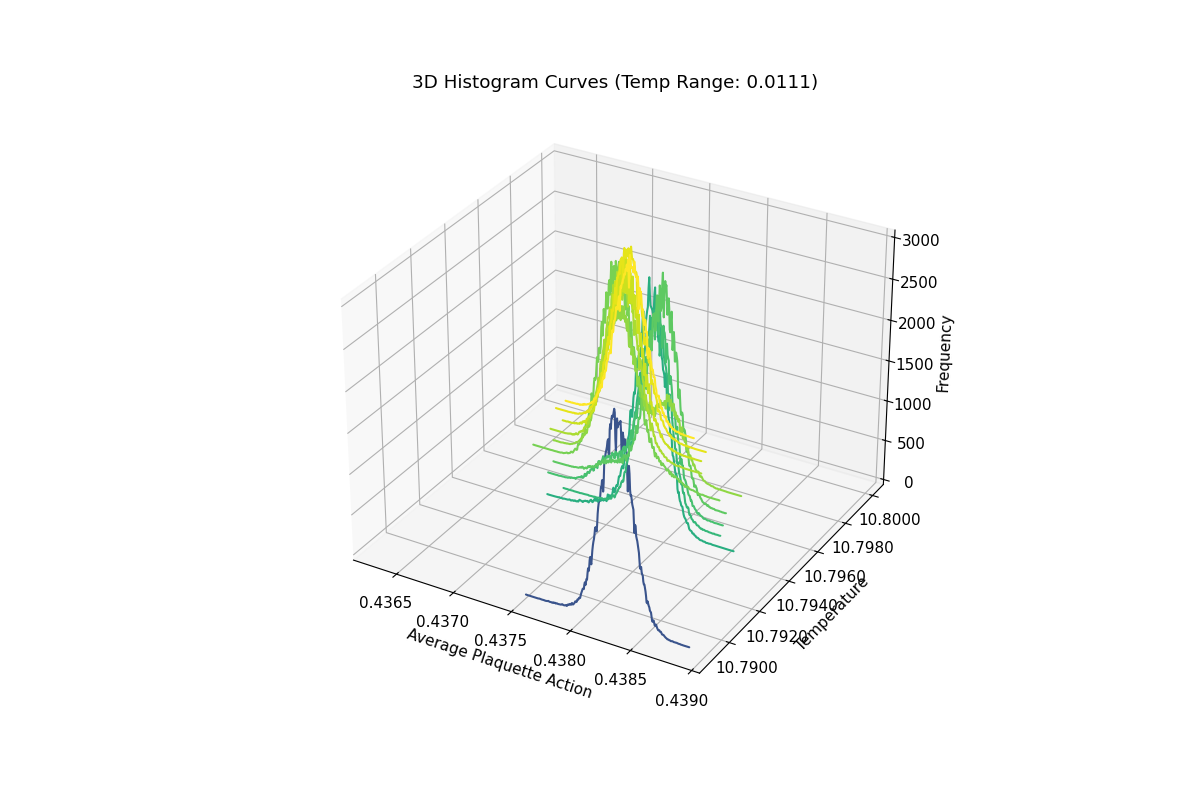

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import make_interp_spline
import matplotlib.cm as cm
%matplotlib widget

def plot_3d_histogram_curves(data_dict, temp_min, temp_max):
    fig = plt.figure(figsize=(12, 8))  # Adjust the figure size here
    ax = fig.add_subplot(111, projection='3d')

    # Filter the data_dict based on the temperature range
    filtered_data_dict = {k: v for k, v in data_dict.items() if temp_min <= float(k.split(" ")[0]) <= temp_max}

    # Create a colormap
    cmap = cm.get_cmap('viridis')
    norm = plt.Normalize(temp_min, temp_max)

    # Create the 3D plot
    for temp, data in reversed(filtered_data_dict.items()):
        hist, bin_edges = np.histogram(data[1000:], bins=200)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        temp_value = float(temp.split(" ")[0])
        color = cmap(norm(temp_value))
        zorder = temp_value  # Use temperature value as zorder to preserve depth perception
        
        # Create a smooth curve for the histogram
        bin_centers_smooth = np.linspace(bin_centers.min(), bin_centers.max(), 300)
        hist_smooth = make_interp_spline(bin_centers, hist)(bin_centers_smooth)
        ax.plot(bin_centers_smooth, [temp_value] * len(bin_centers_smooth), hist_smooth, color=color, solid_capstyle='round', zorder=zorder)
    ax.set_xlabel('Average Plaquette Action')
    ax.set_ylabel('Temperature')
    ax.set_zlabel('Frequency')
    temp_values = [float(k.split(" ")[0]) for k in filtered_data_dict.keys()]
    ax.set_title(f'3D Histogram Curves (Temp Range: {max(temp_values) - min(temp_values):.4f})')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))

    plt.show()

# Plot 3D histogram curves for all plaquette data sets within the temperature range
#plot_3d_histogram_curves(plaquette_data_twist_0, 10.78, 10.79)
plot_3d_histogram_curves(plaquette_data_twist_1, 10.785, 10.80)
#plot_3d_histogram_curves(plaquette_data_twist_2,  10.794, 10.8)

In [19]:
plt.close('all')

In [17]:
plaquette_data_twist_1

{'10.7444 1': array([0.393556, 0.417566, 0.428185, ..., 0.441828, 0.441835, 0.441812]),
 '10.75 1': array([0.393187, 0.417008, 0.427669, ..., 0.441398, 0.441548, 0.441505]),
 '10.7556 1': array([0.393012, 0.416854, 0.427546, ..., 0.440956, 0.441046, 0.441015]),
 '10.7611 1': array([0.392802, 0.416622, 0.42718 , ..., 0.44085 , 0.440773, 0.440662]),
 '10.7667 1': array([0.392616, 0.416238, 0.426472, ..., 0.440249, 0.440113, 0.440272]),
 '10.7722 1': array([0.392267, 0.416025, 0.426551, ..., 0.439582, 0.439518, 0.439621]),
 '10.7778 1': array([0.392136, 0.415638, 0.426291, ..., 0.439205, 0.439273, 0.43931 ]),
 '10.7833 1': array([0.39185 , 0.415483, 0.425825, ..., 0.438691, 0.438619, 0.4388  ]),
 '10.7889 1': array([0.391431, 0.415136, 0.425652, ..., 0.438513, 0.438567, 0.438678]),
 '10.7944 1': array([0.391355, 0.414902, 0.425204, ..., 0.437711, 0.438045, 0.438006]),
 '10.795 1': array([0.391279, 0.414904, 0.425303, ..., 0.437827, 0.437719, 0.437815]),
 '10.7956 1': array([0.391462, 0.41

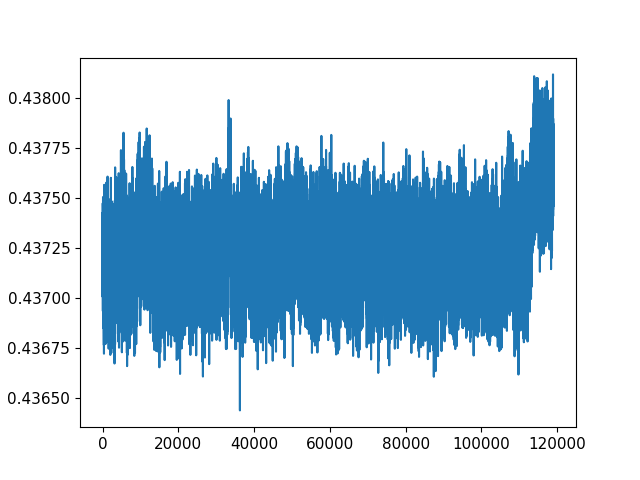

In [20]:
data = plaquette_data_twist_1["10.7969 1"][1000:]
#weights=np.exp(-plaquette_data_twist_muca_weight["10.8053 1"])
#weighted_data = data * weights
#print(weighted_data)
#plt.hist(weighted_data, bins=100, color='blue', alpha=0.7)
plt.plot(list(range(0,len(data))),data)
plt.show()

[0.43685  0.436915 0.437149 ... 0.437761 0.437776 0.437785]


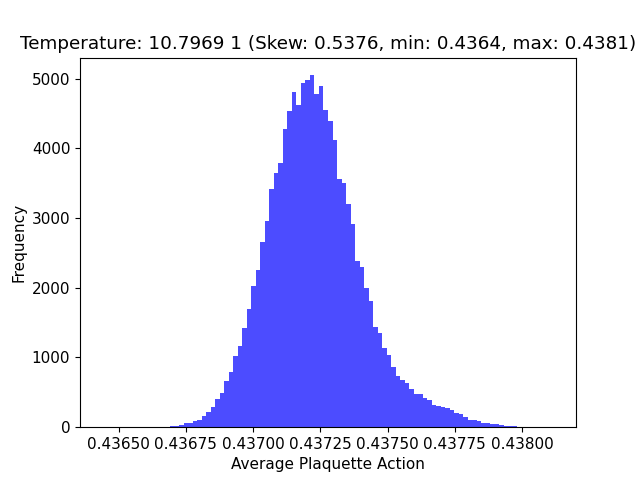

In [21]:
from scipy.stats import skew
import numpy as np

#ax.set_yscale('log')
#index = keys.index('10.95 1')
#plaquette_data_twist_1["10.95 1"]
keys = ["10.7969 1"]
thermalization = 100
plaquette_data = plaquette_data_twist_1
for temp in keys:
    fig, ax = plt.subplots()
    if len(np.shape(plaquette_data[temp])) == 1:
        data = plaquette_data[temp][thermalization:]
        min = plaquette_data[keys[0]][thermalization:].min()
        max = plaquette_data[keys[0]][thermalization:].max()
    else:
        data = plaquette_data[temp][thermalization:][:,-1]
        min = plaquette_data[keys[0]][thermalization:][:,-1].min()
        max = plaquette_data[keys[0]][thermalization:][:,-1].max()
    print(data)
    ax.hist(data, bins=100, color='blue', alpha=0.7)
    skewness = skew(data)
    ax.set_title(f"Temperature: {temp} (Skew: {skewness:.4f}, min: {min:.4f}, max: {max:.4f})")
    ax.set_xlabel('Average Plaquette Action')
    ax.set_ylabel('Frequency')
    #ax.set_yscale('log')
    plt.show()
    


dict_keys(['10.7 1', '10.7105 1', '10.7211 1', '10.7316 1', '10.7421 1', '10.7526 1', '10.7632 1', '10.7737 1', '10.7842 1', '10.7947 1', '10.8 1', '10.8053 1', '10.8158 1', '10.8263 1', '10.8368 1', '10.8474 1', '10.8579 1', '10.8684 1', '10.8789 1', '10.8895 1', '10.9 1', '10.9111 1', '11.0222 1', '11.1333 1', '11.2444 1', '11.3556 1', '11.4667 1', '11.5778 1', '11.6889 1', '11.8 1'])
[0.435679 0.435716 0.435763 ... 0.436135 0.436257 0.436556]


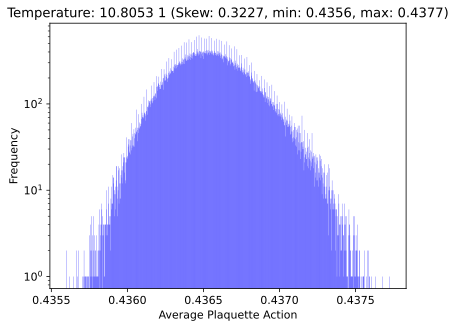

<Figure size 640x480 with 0 Axes>

In [33]:
from scipy.stats import skew


#ax.set_yscale('log')
#index = keys.index('10.95 1')
#plaquette_data_twist_1["10.95 1"]
keys = ["10.8053 1"]
print(plaquette_data_twist.keys())
for temp in keys:
    fig, ax = plt.subplots()
    data = plaquette_data_twist[temp][10:]
    print(data)
    ax.hist(data, bins=1000, color='blue', alpha=0.7)
    skewness = skew(data)
    min = plaquette_data_twist[keys[0]][10:].min()
    max = plaquette_data_twist[keys[0]][10:].max()
    ax.set_title(f"Temperature: {temp} (Skew: {skewness:.4f}, min: {min:.4f}, max: {max:.4f})")
    ax.set_xlabel('Average Plaquette Action')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')
    plt.show()
    plt.savefig("histogram_twist_1.svg")
    


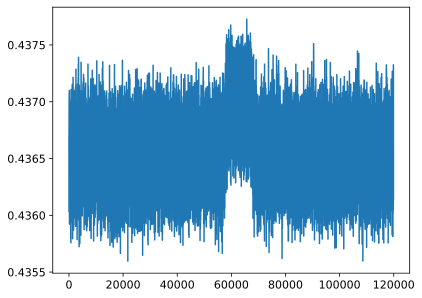

In [32]:
data = plaquette_data_twist[keys[0]][100:]
plt.plot(list(range(0,len(data))),data)